#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 05
**CH05A What Likelihood of Loss to Expect on a Stock Portfolio?**

using the netflix dataset

version 1.0 2021-05-05

In [136]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from datetime import datetime
from scipy.stats import norm

warnings.filterwarnings("ignore")


In [137]:
netflix = pd.read_csv("/workspaces/codespaces-jupyter/data/Netflix_Data.csv")
netflix
# Date: 
# The trading day for the stock quote. Format: MM/DD/YYYY.
# Close/Last: 
# The final price at which the stock traded on that day (also called the “closing price”).
# Volume: 
# The total number of shares traded during that day. It reflects trading activity and investor interest.
# Open: 
# The price at which the stock first traded when the market opened on that day.
# High: 
# The highest price the stock reached during that trading day.
# Low: 
# The lowest price the stock reached during that trading day.


,Unnamed: 0,Date,Adj_Close,Close,High,Low,Open,Volume
0,0,2010-01-04 00:00:00+00:00,7.640000,7.640000,7.961429,7.565714,7.931429,17239600
1,1,2010-01-05 00:00:00+00:00,7.358571,7.358571,7.657143,7.258571,7.652857,23753100
2,2,2010-01-06 00:00:00+00:00,7.617143,7.617143,7.672857,7.197143,7.361429,23290400
3,3,2010-01-07 00:00:00+00:00,7.485714,7.485714,7.757143,7.462857,7.731429,9955400
4,4,2010-01-08 00:00:00+00:00,7.614286,7.614286,7.742857,7.465714,7.498571,8180900
...,...,...,...,...,...,...,...,...
3730,3730,2024-10-29 00:00:00+00:00,759.440002,759.440002,763.880005,748.010010,751.130005,3660400
3731,3731,2024-10-30 00:00:00+00:00,753.739990,753.739990,759.789978,752.280029,758.080017,1722000
3732,3732,2024-10-31 00:00:00+00:00,756.030029,756.030029,760.789978,752.229981,753.929993,3057700
3733,3733,2024-11-01 00:00:00+00:00,756.099976,756.099976,763.799988,747.770019,753.479981,2996800


In [138]:
#return 
netflix["return"] = (netflix["Close"]-netflix["Open"])/netflix["Open"]
netflix

,Unnamed: 0,Date,Adj_Close,Close,High,Low,Open,Volume,return
0,0,2010-01-04 00:00:00+00:00,7.640000,7.640000,7.961429,7.565714,7.931429,17239600,-0.036744
1,1,2010-01-05 00:00:00+00:00,7.358571,7.358571,7.657143,7.258571,7.652857,23753100,-0.038454
2,2,2010-01-06 00:00:00+00:00,7.617143,7.617143,7.672857,7.197143,7.361429,23290400,0.034737
3,3,2010-01-07 00:00:00+00:00,7.485714,7.485714,7.757143,7.462857,7.731429,9955400,-0.031781
4,4,2010-01-08 00:00:00+00:00,7.614286,7.614286,7.742857,7.465714,7.498571,8180900,0.015432
...,...,...,...,...,...,...,...,...,...
3730,3730,2024-10-29 00:00:00+00:00,759.440002,759.440002,763.880005,748.010010,751.130005,3660400,0.011063
3731,3731,2024-10-30 00:00:00+00:00,753.739990,753.739990,759.789978,752.280029,758.080017,1722000,-0.005725
3732,3732,2024-10-31 00:00:00+00:00,756.030029,756.030029,760.789978,752.229981,753.929993,3057700,0.002785
3733,3733,2024-11-01 00:00:00+00:00,756.099976,756.099976,763.799988,747.770019,753.479981,2996800,0.003477


Create percent return

In [139]:
# Fractional change between the current and a prior element. Examples below
netflix["pct_return"] = netflix["Close"].pct_change() * 100
# Count the number of NaN values in the 'fractional_change' column
netflix["pct_return"].isna().sum()

np.int64(1)

In [140]:
netflix[netflix["pct_return"].isna()]

,Unnamed: 0,Date,Adj_Close,Close,High,Low,Open,Volume,return,pct_return
0,0,2010-01-04 00:00:00+00:00,7.64,7.64,7.961429,7.565714,7.931429,17239600,-0.036744,NaN


In [141]:
netflix= netflix.replace("", np.nan).replace("#N/A", np.nan).dropna().reset_index(drop=True)
netflix

,Unnamed: 0,Date,Adj_Close,Close,High,Low,Open,Volume,return,pct_return
0,1,2010-01-05 00:00:00+00:00,7.358571,7.358571,7.657143,7.258571,7.652857,23753100,-0.038454,-3.683623
1,2,2010-01-06 00:00:00+00:00,7.617143,7.617143,7.672857,7.197143,7.361429,23290400,0.034737,3.513890
2,3,2010-01-07 00:00:00+00:00,7.485714,7.485714,7.757143,7.462857,7.731429,9955400,-0.031781,-1.725439
3,4,2010-01-08 00:00:00+00:00,7.614286,7.614286,7.742857,7.465714,7.498571,8180900,0.015432,1.717565
4,5,2010-01-11 00:00:00+00:00,7.604286,7.604286,7.704286,7.528571,7.660000,6783700,-0.007273,-0.131329
...,...,...,...,...,...,...,...,...,...,...
3729,3730,2024-10-29 00:00:00+00:00,759.440002,759.440002,763.880005,748.010010,751.130005,3660400,0.011063,1.377617
3730,3731,2024-10-30 00:00:00+00:00,753.739990,753.739990,759.789978,752.280029,758.080017,1722000,-0.005725,-0.750555
3731,3732,2024-10-31 00:00:00+00:00,756.030029,756.030029,760.789978,752.229981,753.929993,3057700,0.002785,0.303823
3732,3733,2024-11-01 00:00:00+00:00,756.099976,756.099976,763.799988,747.770019,753.479981,2996800,0.003477,0.009252


In [142]:
netflix[netflix["pct_return"].isna()]

,Unnamed: 0,Date,Adj_Close,Close,High,Low,Open,Volume,return,pct_return


In [143]:
netflix['pct_return'].describe()

count    3734.000000
mean        0.173252
std         3.161094
min       -35.116603
25%        -1.240653
50%         0.037314
75%         1.526193
max        42.223510
Name: pct_return, dtype: float64

In [144]:
#Fractial change in action
s = pd.Series([90, 91, None, 85])
s.ffill().pct_change()

0         NaN
1    0.011111
2    0.000000
3   -0.065934
dtype: float64

Create date variables (we dont use these though)

In [145]:
netflix["Date"] = pd.to_datetime(netflix["Date"], format="mixed")
netflix["year"] = netflix["Date"].dt.year
netflix["month"] = netflix["Date"].dt.month
netflix["yearmonth"] = netflix["year"] * 100 + netflix["month"]

In [146]:
netflix

,Unnamed: 0,Date,Adj_Close,Close,High,Low,Open,Volume,return,pct_return,year,month,yearmonth
0,1,2010-01-05 00:00:00+00:00,7.358571,7.358571,7.657143,7.258571,7.652857,23753100,-0.038454,-3.683623,2010,1,201001
1,2,2010-01-06 00:00:00+00:00,7.617143,7.617143,7.672857,7.197143,7.361429,23290400,0.034737,3.513890,2010,1,201001
2,3,2010-01-07 00:00:00+00:00,7.485714,7.485714,7.757143,7.462857,7.731429,9955400,-0.031781,-1.725439,2010,1,201001
3,4,2010-01-08 00:00:00+00:00,7.614286,7.614286,7.742857,7.465714,7.498571,8180900,0.015432,1.717565,2010,1,201001
4,5,2010-01-11 00:00:00+00:00,7.604286,7.604286,7.704286,7.528571,7.660000,6783700,-0.007273,-0.131329,2010,1,201001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729,3730,2024-10-29 00:00:00+00:00,759.440002,759.440002,763.880005,748.010010,751.130005,3660400,0.011063,1.377617,2024,10,202410
3730,3731,2024-10-30 00:00:00+00:00,753.739990,753.739990,759.789978,752.280029,758.080017,1722000,-0.005725,-0.750555,2024,10,202410
3731,3732,2024-10-31 00:00:00+00:00,756.030029,756.030029,760.789978,752.229981,753.929993,3057700,0.002785,0.303823,2024,10,202410
3732,3733,2024-11-01 00:00:00+00:00,756.099976,756.099976,763.799988,747.770019,753.479981,2996800,0.003477,0.009252,2024,11,202411


### Figure 5.1 Histogram of daily returns in the entire data

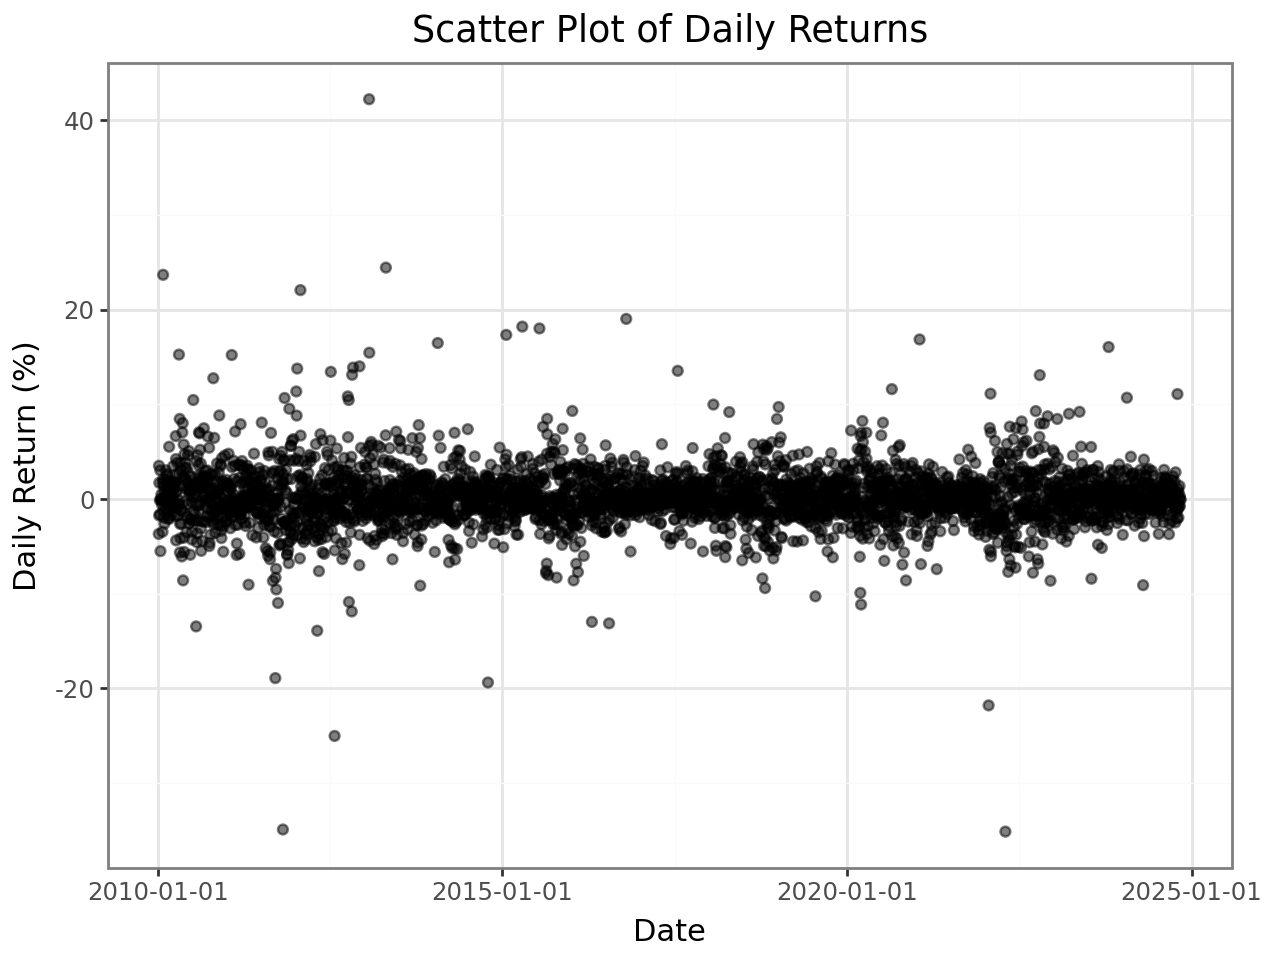

In [147]:
(
    ggplot(netflix, aes(x="Date", y="pct_return"))
    + geom_point(alpha=0.5)
    + labs(x="Date", y="Daily Return (%)", title="Scatter Plot of Daily Returns")
    + theme_bw()
)


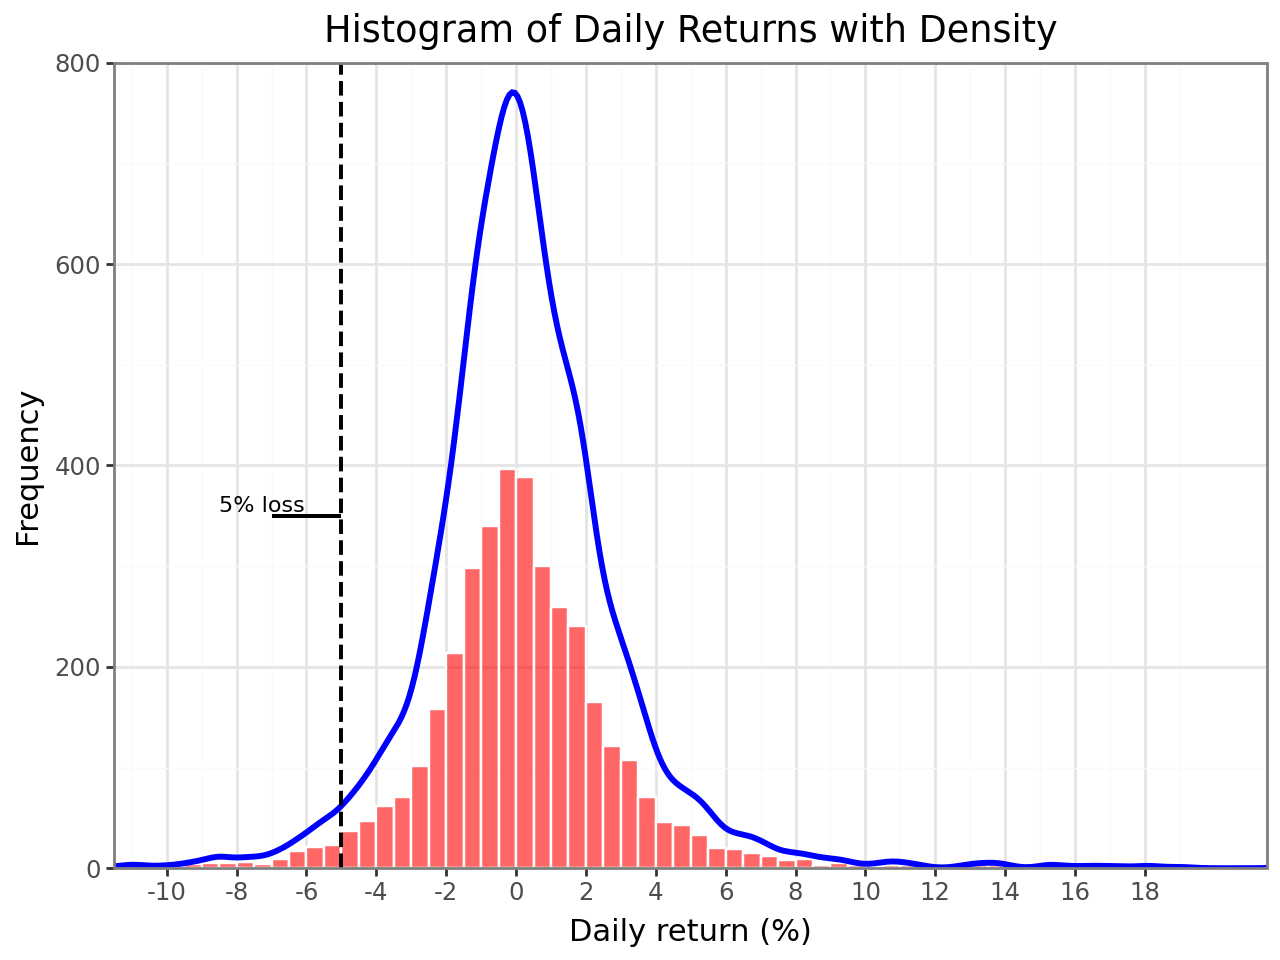

In [148]:
(
    ggplot(netflix, aes("pct_return"))
    + geom_histogram(
        binwidth=0.5, color="white", fill="red", boundary=0, closed="left", alpha=0.6
    )
    + geom_density(aes(y="..count.."), color="blue", size=1.2)
    + geom_vline(xintercept=-5, size=0.8, color="black", linetype="dashed")
    + labs(x="Daily return (%)", y="Frequency", title="Histogram of Daily Returns with Density")
    + coord_cartesian(xlim=[-10, 20], ylim=[0, 800])
    + scale_x_continuous(breaks=np.arange(-10, 20, 2))
    + scale_y_continuous(expand=[0, 0])
    + geom_segment(aes(x=-7, y=350, xend=-5, yend=350), arrow=None, color="black")
    + annotate("text", x=-8.5, y=360, label="5% loss", size=8, ha='left')
    + theme_bw()
)


In [149]:
netflix["pct_return"].describe()

count    3734.000000
mean        0.173252
std         3.161094
min       -35.116603
25%        -1.240653
50%         0.037314
75%         1.526193
max        42.223510
Name: pct_return, dtype: float64

In [150]:
netflix["return"].describe()

count    3734.000000
mean        0.000886
std         0.023658
min        -0.168420
25%        -0.012065
50%        -0.000308
75%         0.013139
max         0.193194
Name: return, dtype: float64

In [151]:
netflix["return"].median()

np.float64(-0.00030839813836341045)

In [152]:
netflix["return"].median()-netflix["return"].mean()

np.float64(-0.001194212713091981)

In [153]:
netflixmax=netflix.loc[netflix["pct_return"].idxmax()]
netflixmax

Unnamed: 0                          769
Date          2013-01-24 00:00:00+00:00
Adj_Close                         20.98
Close                             20.98
High                          21.309999
Low                           19.945715
Open                              20.57
Volume                        118805400
return                         0.019932
pct_return                     42.22351
year                               2013
month                                 1
yearmonth                        201301
Name: 768, dtype: object

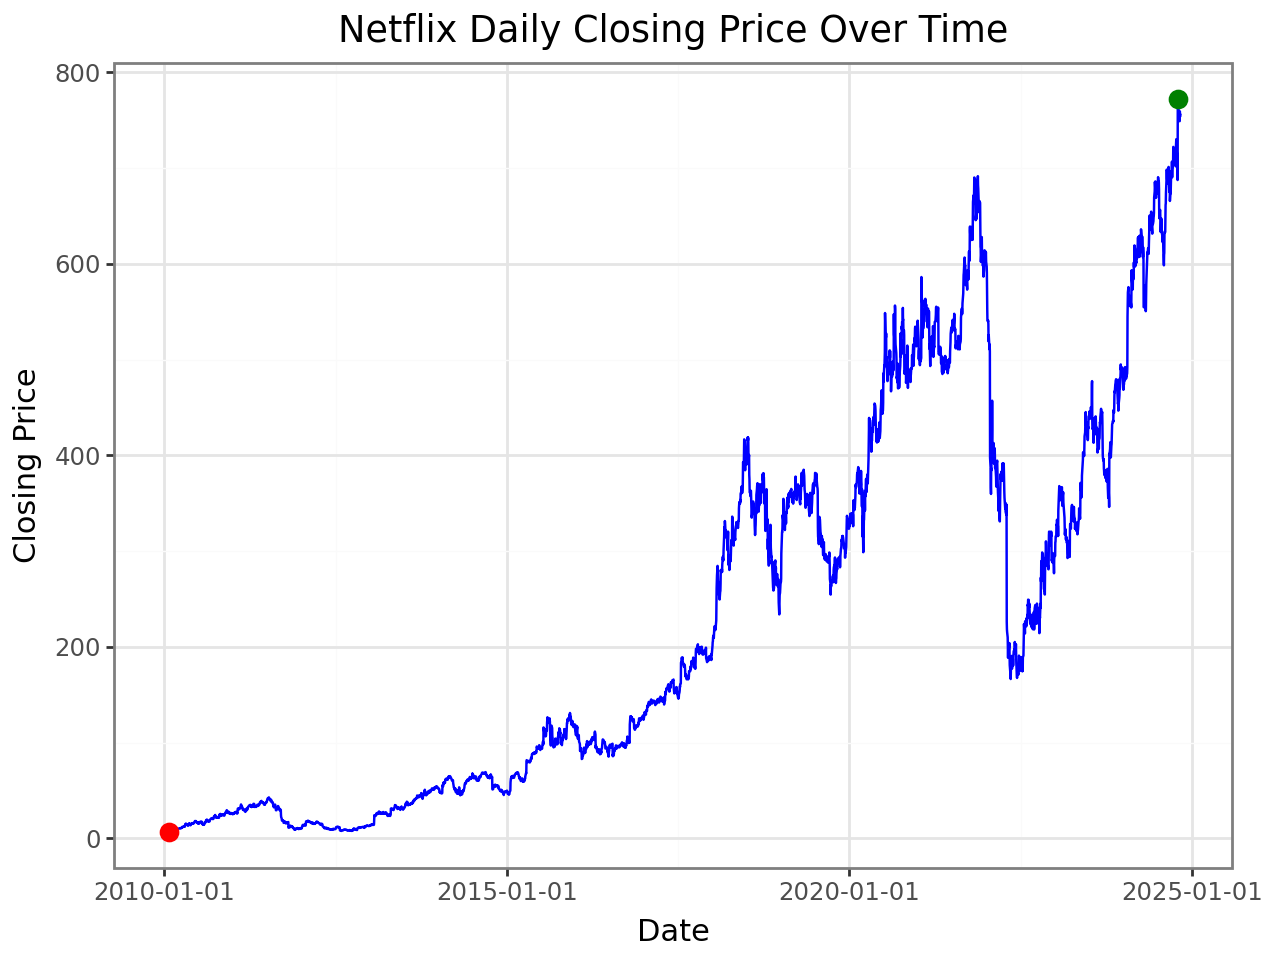

In [154]:
(
    ggplot(netflix, aes(x="Date", y="Close"))
    + geom_line(color="blue")
    + geom_point(
        data=netflix.loc[[netflix["Close"].idxmax()]],
        mapping=aes(x="Date", y="Close"),
        color="green",
        size=3
    )
    + geom_point(
        data=netflix.loc[[netflix["Close"].idxmin()]],
        mapping=aes(x="Date", y="Close"),
        color="red",
        size=3
    )
    + labs(x="Date", y="Closing Price", title="Netflix Daily Closing Price Over Time")
    + theme_bw()
)

In [155]:
netflix.count()
netflix
netflixless5 = netflix.loc[netflix["pct_return"] < -5].reset_index(drop=True)
netflixless5["pct_return_decimal"] = netflixless5["pct_return"] / 100
netflixless5

,Unnamed: 0,Date,Adj_Close,Close,High,Low,Open,Volume,return,pct_return,year,month,yearmonth,pct_return_decimal
0,8,2010-01-14 00:00:00+00:00,7.284286,7.284286,7.575714,7.270000,7.518571,17685500,-0.031161,-5.504067,2010,1,201001,-0.055041
1,78,2010-04-27 00:00:00+00:00,14.581429,14.581429,15.151429,14.518571,15.010000,34263600,-0.028552,-5.639271,2010,4,201004,-0.056393
2,86,2010-05-07 00:00:00+00:00,13.012857,13.012857,14.285714,12.918571,13.857143,25908400,-0.060928,-6.063725,2010,5,201005,-0.060637
3,91,2010-05-14 00:00:00+00:00,14.365714,14.365714,15.138571,14.290000,15.071429,34964300,-0.046825,-8.590130,2010,5,201005,-0.085901
4,95,2010-05-20 00:00:00+00:00,13.570000,13.570000,13.995714,13.284286,13.821429,28922600,-0.018191,-5.585928,2010,5,201005,-0.055859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3215,2022-10-11 00:00:00+00:00,214.289993,214.289993,230.440002,213.699997,226.050003,15282400,-0.052024,-6.822334,2022,10,202210,-0.068223
107,3261,2022-12-15 00:00:00+00:00,290.410004,290.410004,303.390015,286.549988,302.119995,17724600,-0.038759,-8.627249,2022,12,202212,-0.086272
108,3408,2023-07-20 00:00:00+00:00,437.420013,437.420013,448.500000,432.000000,447.000000,23989700,-0.021432,-8.410977,2023,7,202307,-0.084110
109,3446,2023-09-13 00:00:00+00:00,412.239990,412.239990,438.399994,410.690002,435.500000,11843000,-0.053410,-5.164603,2023,9,202309,-0.051646


In [156]:
netflix['Date'].min(), netflix['Date'].max()

(Timestamp('2010-01-05 00:00:00+0000', tz='UTC'),
 Timestamp('2024-11-04 00:00:00+0000', tz='UTC'))

In [157]:
netflix["pct_return"].mean()

np.float64(0.17325186938449477)

In [158]:
true_share = (netflix["pct_return"] <= -5).mean()
print(true_share)

0.029726834493840386


### Figure 5.2 prep

 Create 10 000 samples, with 500 and 1000 observations in each sample, taken from netflix["pct_return"]

In every sample: for each observation, check if it is a loss of 5% or more. Then calculate the percentage of observations out of 500 or 1000 where the loss exceeds 5%. 

In [159]:
n_samples = 10000  # Define the number of samples

# For n=1000
samples_1000 = np.random.choice(netflix["pct_return"].dropna(), size=(n_samples, 1000), replace=True)
a=samples_1000 < -5

nobs_1000 = np.mean(samples_1000 < -5, axis=1)

# For n=500
samples_500 = np.random.choice(netflix["pct_return"].dropna(), size=(n_samples, 500), replace=True)
nobs_500 = np.mean(samples_500 < -5, axis=1)


In [160]:
a = pd.DataFrame(a)
a

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [161]:
nobs_df = pd.DataFrame({"nobs_500": nobs_500, "nobs_1000": nobs_1000})*100

In [162]:
a = pd.DataFrame(samples_1000).T
a

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,-5.043879,-2.517540,0.359981,1.654099,-5.560213,0.292016,4.608033,-1.484146,1.678360,-4.110882,...,-1.974935,0.916452,1.058095,0.799271,2.524543,-0.270556,-1.033522,0.359717,8.244450,-0.606149
1,3.406409,0.223862,4.324614,-2.185405,-1.116306,2.826537,-1.347084,1.797574,2.019707,1.205896,...,0.784874,3.143870,2.448880,-1.588537,-2.005814,8.814628,1.118582,-0.133332,-1.488071,0.883587
2,-0.897700,-5.099034,-0.097582,0.441606,-1.998192,0.189052,2.897518,-2.651855,-0.220499,-4.280535,...,-1.190995,-3.753259,0.161454,8.481088,5.431715,-1.325188,10.459584,1.223854,1.653160,-0.434007
3,4.344824,2.080189,0.842106,-0.434007,4.323947,1.801342,-2.033647,-1.493430,1.201956,-0.290303,...,-3.073660,-0.600992,0.275594,0.359717,1.010844,-1.398023,0.431148,3.097418,3.990732,-2.034509
4,0.918957,0.189052,-0.027844,2.544312,-0.599427,-13.447556,2.092602,-0.678909,3.062614,-2.234840,...,-0.165347,0.278422,-3.711409,0.271442,1.084315,-3.271142,4.924103,1.364177,-25.015547,0.603518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.226812,-0.103368,-0.818825,-4.615554,-0.839757,-3.533256,-1.035546,-0.087576,0.537069,-0.964092,...,0.506704,2.585105,8.461601,-1.033438,-0.952674,-1.068832,5.803263,-0.987084,1.343263,-2.328025
996,6.677236,1.989065,0.445926,-1.604196,-13.447556,0.430778,0.771944,-0.209707,2.070136,1.082285,...,-0.551196,0.393555,-1.249677,0.461375,0.138978,1.473318,4.462911,0.711183,1.748131,0.093730
997,3.704684,1.584560,-0.604920,1.371099,1.172402,-1.040631,-0.732045,0.360254,4.032933,5.270068,...,0.029114,-0.340267,-4.308581,1.456952,3.124372,3.070606,1.419625,-0.292113,1.229760,-1.880634
998,4.187771,-2.910774,1.373194,-2.559741,-0.381203,-0.779735,1.547570,3.354866,-1.701942,0.296753,...,2.935429,0.474642,-1.048666,1.753352,1.762711,-0.653061,0.346405,0.883587,-1.736399,0.985156


In [163]:
nobs_df

,nobs_500,nobs_1000
0,3.4,3.2
1,3.8,3.1
2,3.8,2.9
3,2.0,3.2
4,2.4,4.0
...,...,...
9995,3.4,2.4
9996,3.6,3.2
9997,3.2,1.9
9998,3.0,3.9


In [164]:
error = (
    norm.ppf(0.975) * np.std(nobs_df["nobs_1000"]) / np.sqrt(len(nobs_df["nobs_1000"]))
)
left = np.mean(nobs_df["nobs_1000"]) - error
right = np.mean(nobs_df["nobs_1000"]) + error


### Figure 5.2

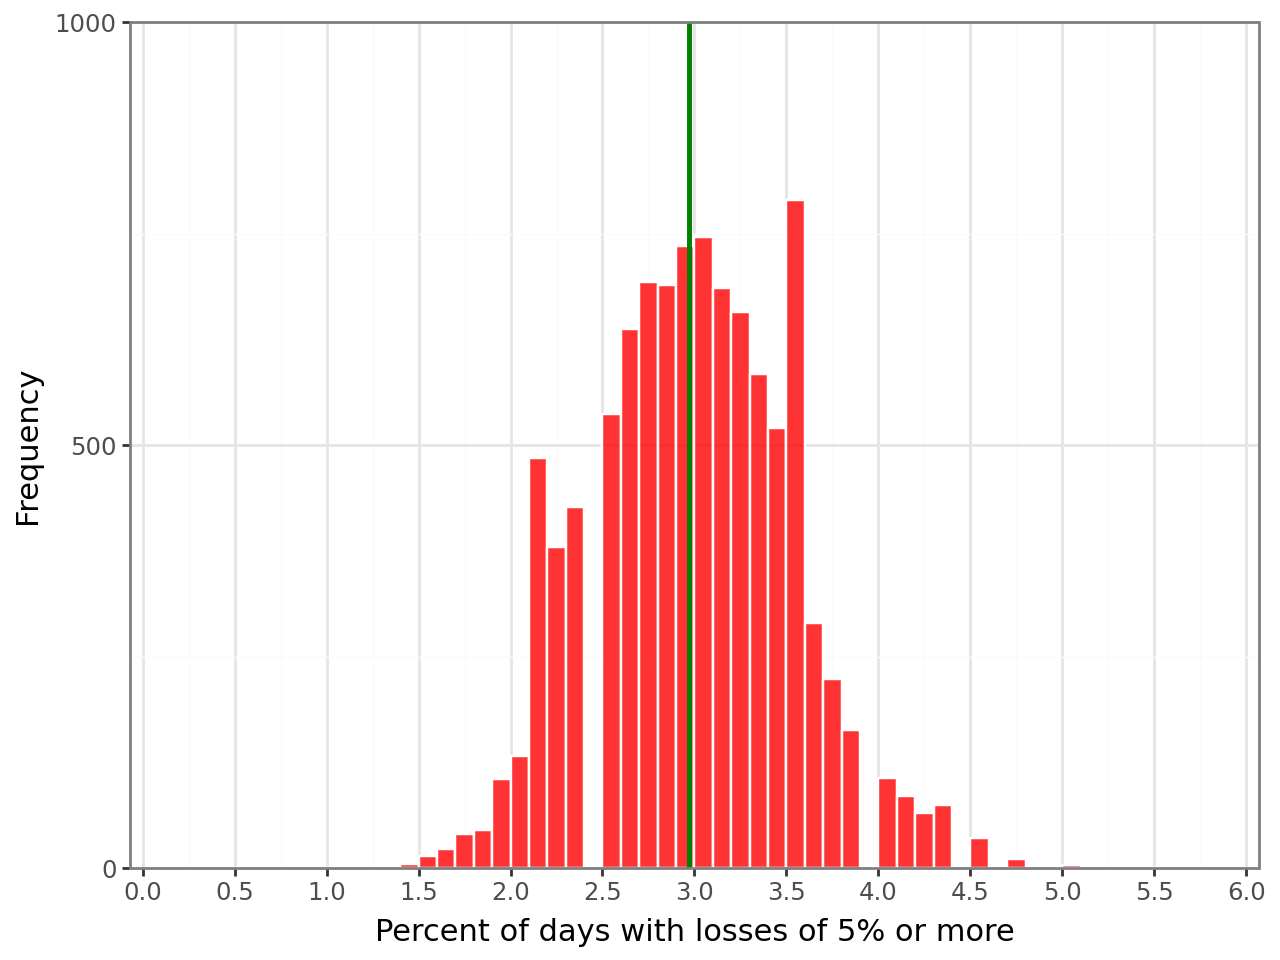

In [165]:
(
    ggplot(nobs_df, aes("nobs_1000"))
    + geom_histogram(
        binwidth=0.1,
        color="white",
        fill="red",
        alpha=0.8,
        center=0.75,
        closed="left",
    )
    + labs(x="Percent of days with losses of 5% or more", y="Frequency")
    + geom_vline(aes(xintercept=nobs_df["nobs_1000"].mean()), color="green", size=1)
    + coord_cartesian(xlim=[0, 6], ylim=(0, 1000))
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 6), breaks=np.arange(0, 6.5, 0.5))
    + scale_y_continuous(
        expand=(0.00, 0.00), limits=(0, 1000), breaks=np.arange(0, 2500, 500)
    )
    + geom_segment(aes(x=0.8, y=2000, xend=0.52, yend=2000))
    + annotate("text", x=0.9, y=2000, label="Mean", size=12)
    + theme_bw()
)

In [166]:
nobs_df["nobs_1000"].std()

np.float64(0.5398398156885618)

In [167]:
nobs_df["nobs_500"].std()

np.float64(0.7610773347505148)

In [168]:
nobs_df["nobs_1000"].mean()

np.float64(2.97131)

In [169]:
nobs_df["nobs_500"].mean()

np.float64(2.9698800000000003)

### Figure 5.3 

Not working with epanechnikov kernel

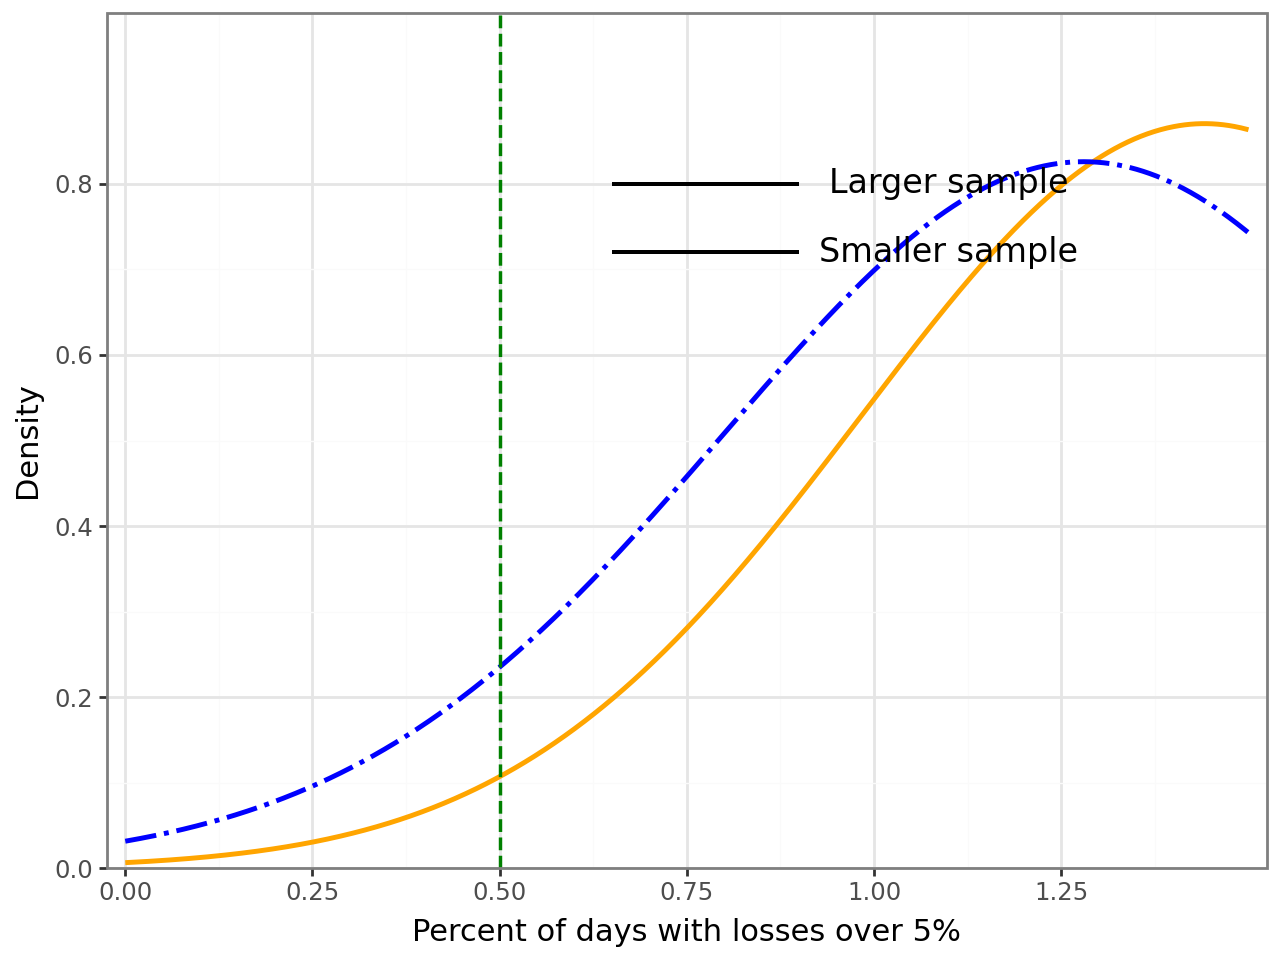

In [170]:
(
    ggplot(nobs_df)
    + stat_density(aes(x="nobs_1000"), color="orange", geom="line", bw=0.45, size=1)
    + stat_density(
        aes("nobs_500"),
        color="blue",
        geom="line",
        bw=0.45,
        linetype="dashdot",
        size=1,
    )
    + labs(x="Percent of days with losses over 5%", y="Density")
    + geom_vline(xintercept=0.5, color="green", size=0.7, linetype="dashed")
    + geom_segment(aes(x=0.9, y=0.8, xend=0.65, yend=0.8), size=0.5)
    + annotate("text", x=1.1, y=0.8, label="Larger sample", size=12)
    + geom_segment(aes(x=0.9, y=0.72, xend=0.65, yend=0.72), size=0.5)
    + annotate("text", x=1.1, y=0.72, label="Smaller sample", size=12)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 1.5), breaks=np.arange(0, 1.5, 0.25))
    + scale_y_continuous(expand=(0.00, 0.00), limits=(0, 1), breaks=np.arange(0, 1, 0.2))
    + theme_bw()
    + theme(
        legend_position="none",
    )
)

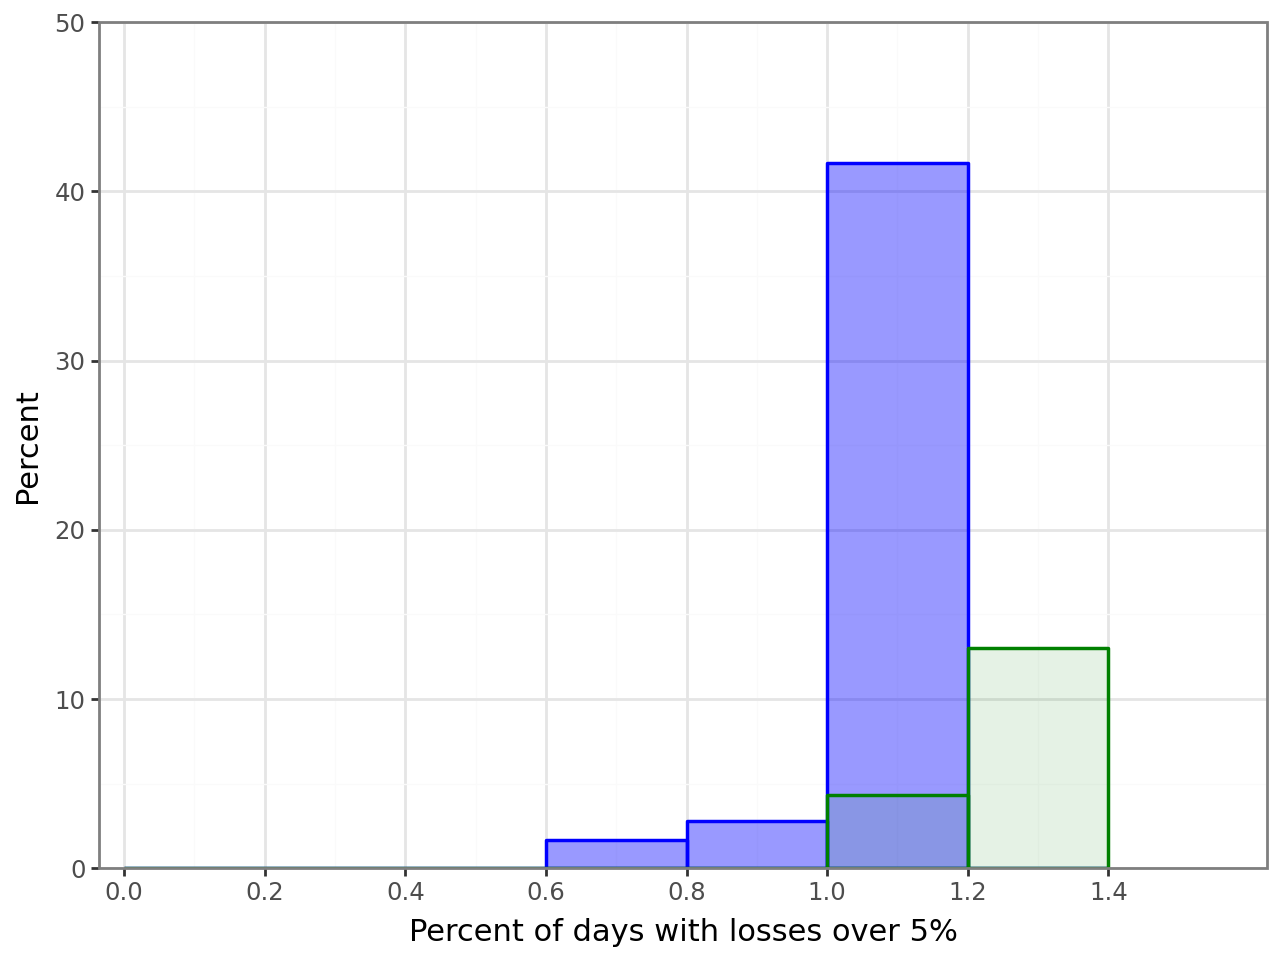

In [171]:
(
    ggplot(nobs_df)
    + geom_histogram(
        aes(x="nobs_500", y="stat(count)/sum(stat(count))*100"),
        color="blue",
        fill="blue",
        binwidth=0.2,
        center=0.5,
        size=0.7,
        alpha=0.4,
        closed="left",
    )
    + geom_histogram(
        aes(x="nobs_1000", y="stat(count)/sum(stat(count))*100"),
        color="green",
        fill="green",
        binwidth=0.2,
        center=0.5,
        alpha=0.1,
        size=0.7,
        closed="left",
    )
    + ylab("Percent")
    + xlab("Percent of days with losses over 5%")
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(-0.01, 1.6), breaks=np.arange(0, 1.6, 0.2)
    )
    + scale_y_continuous(expand=(0.00, 0.00), limits=(0, 50))
    + scale_color_manual(
        labels=("N = 1000", "N = 500"), name="", values=("blue", "green")
    )
    + scale_alpha_identity()
    + scale_fill_identity()
    + theme_bw()
    + theme(
        legend_direction="horizontal",
    )
)


Create bootstrap samples

In [172]:
bootstrap_samples = np.random.choice(
    netflix["pct_return"].dropna(),
    size=(10000, len(netflix["pct_return"].dropna())),
    replace=True
)

In [173]:
pd.DataFrame(bootstrap_samples).T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,-0.250521,-0.072645,-0.690284,-0.898573,2.511507,-1.038642,1.123148,-0.023579,3.739030,3.227206,...,-5.281957,3.437443,0.951894,-0.649672,0.675674,0.838482,-2.214231,-3.403756,-0.436016,-2.595845
1,5.093226,-1.508452,0.735741,-2.542190,-4.900053,-1.824528,3.704684,-1.983010,1.244853,-0.040686,...,0.981278,0.264967,10.456740,-0.125902,1.987542,3.068839,3.642676,6.202918,-1.858104,0.987144
2,-2.483326,0.464857,-2.492272,-2.317122,1.371099,-0.067866,0.919929,-3.389085,0.267195,-0.028858,...,-0.562585,-1.324045,-4.705665,-2.763743,-1.833488,4.178580,-0.793382,1.498166,1.725714,1.186044
3,-1.215231,0.090496,-0.118008,3.727154,-2.504487,-6.922081,1.846933,-0.295492,-2.313390,-1.969259,...,0.455664,-0.575391,1.825131,-1.372413,-2.281220,2.557463,-0.143054,-1.041226,0.633428,-4.838411
4,1.348997,-6.264961,2.710289,-4.176556,-4.693140,-0.236292,1.743046,1.182421,4.462911,0.016033,...,0.771944,0.766601,-1.469824,-0.878428,4.474139,-0.105999,-0.324616,1.915914,3.483630,2.132487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729,0.552050,1.279295,-0.380258,2.651792,-2.285568,1.032097,0.596588,1.708709,-0.266742,0.336427,...,-0.580754,-0.740047,2.012364,0.298591,-0.772380,-0.495059,-4.499042,-0.772380,1.084559,-2.313390
3730,1.717109,13.119814,-5.564401,0.274074,-0.762062,-1.816845,-1.558431,0.380015,3.187423,3.974172,...,-1.258635,-4.366075,-0.829006,2.737902,-3.690646,-1.624729,-0.487963,-1.866475,-2.743914,0.577754
3731,6.848946,-2.655133,-5.504067,0.645618,-5.641898,0.700875,-1.421774,-1.031879,-0.410858,-1.017396,...,-0.189096,4.937916,0.895244,1.457374,7.984041,-1.110063,-2.887445,-1.686177,-0.602124,-0.334903
3732,-0.310032,-0.118053,0.114787,-4.178325,0.468544,4.983674,-3.320998,-2.823125,0.355631,0.302534,...,-3.254414,2.595536,-1.686892,-0.815552,0.469388,-2.530016,-0.501957,0.016684,0.878336,-4.573039


Calculate percent of days wit losses over  thresholds from -1 to 10

In [188]:
bootstrap_loss_results = pd.DataFrame(
    [
        np.mean(bootstrap_samples < -1 * pct_loss, axis=1) * 100
        for pct_loss in range(1, 11)
    ],
    index=[f"loss{i}" for i in range(1, 11)],
).T

In [193]:
bootstrap_loss_results

,loss1,loss2,loss3,loss4,loss5,loss6,loss7,loss8,loss9,loss10
0,28.307445,16.282807,9.185860,5.275844,2.999464,1.847884,1.258704,0.937333,0.589181,0.401714
1,29.700054,16.443492,9.051955,4.927691,2.704874,1.794322,1.151580,0.803428,0.615961,0.428495
2,28.441350,14.970541,8.114622,5.302625,3.026245,1.794322,0.830209,0.589181,0.428495,0.214247
3,29.807177,16.014997,8.810927,5.302625,2.678093,1.606856,1.044456,0.883771,0.642742,0.508838
4,30.101768,16.711302,9.132298,5.623996,2.919122,1.526513,1.044456,0.830209,0.642742,0.589181
...,...,...,...,...,...,...,...,...,...,...
9995,29.137654,16.443492,9.266202,5.677558,2.999464,1.928227,1.178361,0.964114,0.615961,0.455276
9996,29.860739,16.122121,8.757365,5.356186,2.972683,1.821103,1.124799,0.776647,0.508838,0.428495
9997,29.137654,15.211569,8.489555,4.927691,2.892341,1.767542,0.964114,0.669523,0.482057,0.348152
9998,29.700054,15.720407,9.078736,5.490091,2.758436,1.553294,0.964114,0.615961,0.508838,0.321371


Plot percent of days with losses over -5%

In [ ]:
(
    ggplot(bootstrap_loss_results, aes("loss5"))
    + geom_histogram(
        fill="black", color="white", binwidth=0.04, boundary=0, closed="left"
    )
    + scale_y_continuous(expand=(0, 0), limits=(0, 1200), breaks=np.arange(0, 1200, 200))
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 1.2), breaks=np.arange(0, 1.2, 0.1))
    + labs(x="Percent of days with losses of 5% or more", y="Frequency")
    + theme_bw()
)


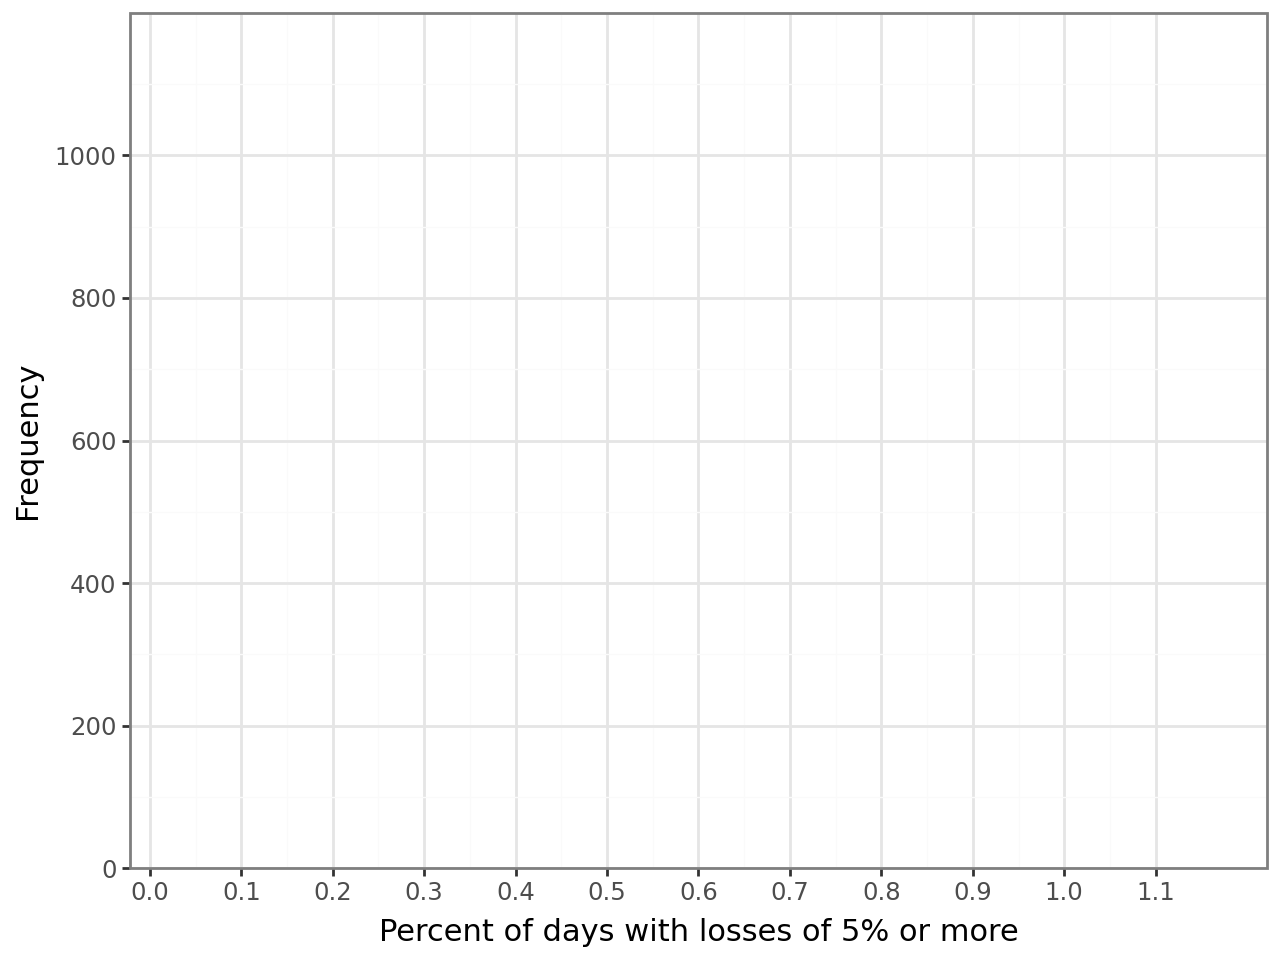

In [192]:
(
    ggplot(bootstrap_loss_results, aes("loss5"))
    + geom_histogram(
        fill="black", color="white", binwidth=0.04, boundary=0, closed="left"
    )
    + scale_y_continuous(expand=(0, 0), limits=(0, 1200), breaks=np.arange(0, 1200, 200))
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 1.2), breaks=np.arange(0, 1.2, 0.1))
    + labs(x="Percent of days with losses of 5% or more", y="Frequency")
    + theme_bw()
)


In [177]:
bootstrap_loss_results["loss5"].std()

np.float64(0.2802478830496692)

In [178]:
mean_loss5 = bootstrap_loss_results["loss5"].mean()
se_bootstrap = bootstrap_loss_results["loss5"].std()
ci_lower_se = mean_loss5 - 2 * se_bootstrap
ci_upper_se = mean_loss5 + 2 * se_bootstrap

print(f"Approximate 95% CI using SE*2: [{ci_lower_se:.4f}, {ci_upper_se:.4f}]")

Approximate 95% CI using SE*2: [2.4116, 3.5326]


In [179]:
# Assuming bootstrap_loss_results["loss5"] is a Series of bootstrap results
ci_lower = bootstrap_loss_results["loss5"].quantile(0.025)
ci_upper = bootstrap_loss_results["loss5"].quantile(0.975)

print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


95% Confidence Interval: [2.4371, 3.5351]


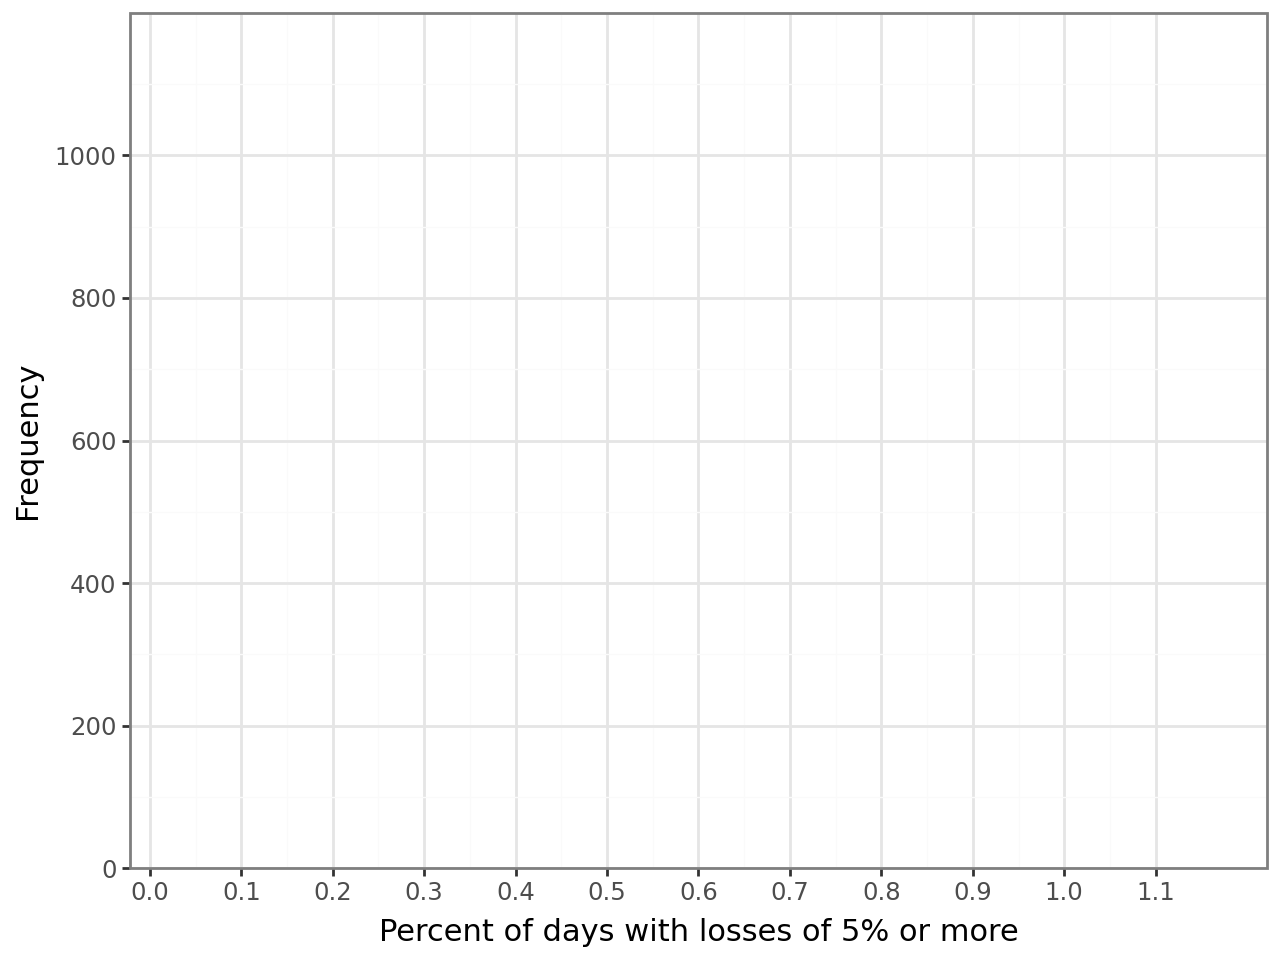

In [180]:
from plotnine import geom_vline, annotate

ci_lower = bootstrap_loss_results["loss5"].quantile(0.025)
ci_upper = bootstrap_loss_results["loss5"].quantile(0.975)

(
    ggplot(bootstrap_loss_results, aes("loss5"))
    + geom_histogram(
        fill="black", color="white", binwidth=0.04, boundary=0, closed="left"
    )
    + geom_vline(xintercept=ci_lower, color="blue", linetype="dashed")
    + geom_vline(xintercept=ci_upper, color="blue", linetype="dashed")
    + annotate("text", x=ci_lower + 0.02, y=1150, label=f"2.5% = {ci_lower:.2f}", size=10)
    + annotate("text", x=ci_upper - 0.06, y=1150, label=f"97.5% = {ci_upper:.2f}", size=10)
    + scale_y_continuous(expand=(0, 0), limits=(0, 1200), breaks=np.arange(0, 1200, 200))
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 1.2), breaks=np.arange(0, 1.2, 0.1))
    + labs(x="Percent of days with losses of 5% or more", y="Frequency")
    + theme_bw()
)


## Standard Error

In [181]:
netflix.count()

Unnamed: 0    3734
Date          3734
Adj_Close     3734
Close         3734
High          3734
Low           3734
Open          3734
Volume        3734
return        3734
pct_return    3734
year          3734
month         3734
yearmonth     3734
dtype: int64

In [182]:
ncov = round(1 / np.sqrt(netflix.count()),2)
ncov

Unnamed: 0    0.02
Date          0.02
Adj_Close     0.02
Close         0.02
High          0.02
Low           0.02
Open          0.02
Volume        0.02
return        0.02
pct_return    0.02
year          0.02
month         0.02
yearmonth     0.02
dtype: float64

In [183]:
# Calculate the indicator for loss > 5%
loss_indicator = (netflix["pct_return"] <= -5).dropna()
std_loss5 = loss_indicator.std(ddof=1)
print(f"Standard deviation of loss5 indicator: {std_loss5:.4f}")


Standard deviation of loss5 indicator: 0.1699


In [184]:
SE=std_loss5 *ncov
SE=SE*100
SE

Unnamed: 0    0.339711
Date          0.339711
Adj_Close     0.339711
Close         0.339711
High          0.339711
Low           0.339711
Open          0.339711
Volume        0.339711
return        0.339711
pct_return    0.339711
year          0.339711
month         0.339711
yearmonth     0.339711
dtype: float64

### Compare with we got from bootstrap

In [185]:
std_loss5 = bootstrap_loss_results["loss5"].std()
print(f"Standard deviation of fraction of 5%+ loss: {std_loss5}")

Standard deviation of fraction of 5%+ loss: 0.2802478830496692


### And just to calc a Confidence Interval for original dataset netflix

In [186]:
from scipy.stats import norm

mean_loss5_or = loss_indicator.mean()
std_loss5_or = loss_indicator.std(ddof=1)
n = loss_indicator.count()
se = std_loss5_or / np.sqrt(n)
z = norm.ppf(0.975)  # 1.96 for 95% CI

ci_lower =round((mean_loss5_or - z * se)*100,1)
ci_upper =round((mean_loss5_or + z * se)*100,1)

print(f"95% Confidence Interval: [{ci_lower:.1f}, {ci_upper:.1f}]")


95% Confidence Interval: [2.4, 3.5]


In [187]:
std_loss5.std()

np.float64(0.0)